In [1]:
import numpy as np  #does mathematical operation
import matplotlib.pyplot as plt #For plotting the graphs
import pandas as pd #making the data frames and import the csv files
import math
import random

In [2]:
from google.colab import drive #to import the google drive data

In [3]:
drive.mount('/content/drive')   # to mount the drive data into the colab cloud and enter the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd /content/drive/"My Drive/ML nishit sir/Ass kmeans" 

/content/drive/My Drive/ML nishit sir/Ass kmeans


Text(0.5, 1.0, 'Original')

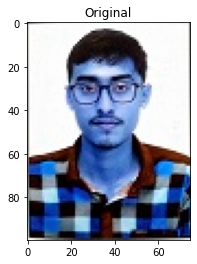

In [5]:
import cv2                          # computer vision version-2 used for read image
import matplotlib.image as mpimg     #used for image plotting
# import image
img = cv2.imread('smitpassport.jpg')
plt.imshow(img)
plt.title("Original")

In [6]:
img   # Arroy of RGB along with Pixels

array([[[115, 110, 107],
        [156, 151, 148],
        [161, 157, 156],
        ...,
        [238, 238, 238],
        [243, 243, 243],
        [140, 141, 139]],

       [[215, 210, 207],
        [255, 254, 251],
        [255, 253, 252],
        ...,
        [251, 251, 251],
        [253, 253, 253],
        [145, 146, 144]],

       [[206, 203, 199],
        [255, 255, 252],
        [255, 254, 253],
        ...,
        [255, 255, 254],
        [255, 255, 254],
        [144, 145, 143]],

       ...,

       [[189, 196, 191],
        [  0,   1,   0],
        [  4,   0,   0],
        ...,
        [ 24,  37, 111],
        [ 18,  41, 116],
        [ 22,  58, 122]],

       [[202, 201, 191],
        [ 17,  16,   6],
        [  7,   1,   0],
        ...,
        [  3,  11,  41],
        [  0,   6,  34],
        [  0,   9,  27]],

       [[236, 233, 219],
        [251, 248, 234],
        [249, 242, 233],
        ...,
        [204, 209, 218],
        [207, 216, 220],
        [220, 234, 230]]

In [7]:
img.shape

(100, 75, 3)

In [8]:
img = (img/255).reshape(100*75,3)    # limits the value

In [9]:
img

array([[0.45098039, 0.43137255, 0.41960784],
       [0.61176471, 0.59215686, 0.58039216],
       [0.63137255, 0.61568627, 0.61176471],
       ...,
       [0.8       , 0.81960784, 0.85490196],
       [0.81176471, 0.84705882, 0.8627451 ],
       [0.8627451 , 0.91764706, 0.90196078]])

In [10]:
#Euclidean Distance
def cal_distance(x1,x2):
    return (sum((x1-x2)**2))**0.5

In [11]:
# get closest centroid to each data
def findClosestCentroid(c,x):
    assign_centroid=[]
    for i in x:
        distance=[]
        for j in c:
            distance.append(cal_distance(i,j))
        assign_centroid.append(np.argmin(distance))
    return assign_centroid

In [12]:
# Calculate new Centroids by calculating mean of each cluster
def cal_centroids(cluster,x):
    new_centroid=[]
    new_df1=pd.concat([pd.DataFrame(x),pd.DataFrame(cluster,columns=['cluster'])],axis=1)
    for c in set(new_df1['cluster']):             #return unique value of cluster
        current_cluster = new_df1[new_df1['cluster']==c][new_df1.columns[:-1]]      #considering all X and Y values for particular cluster 'C'
        current_mean = current_cluster.mean(axis=0)
        new_centroid.append(current_mean)

    return new_centroid

In [13]:
epoch=15

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


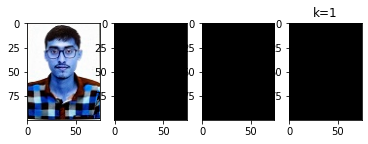

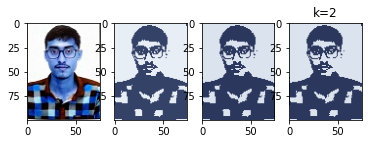

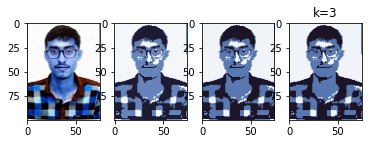

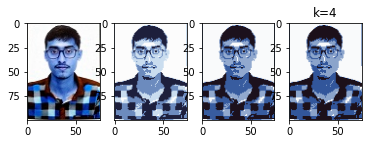

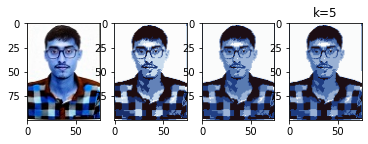

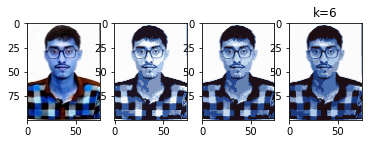

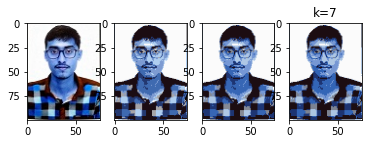

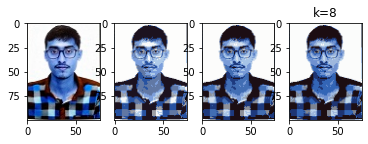

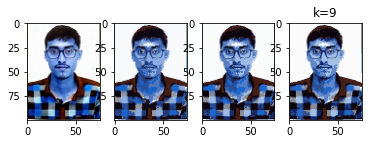

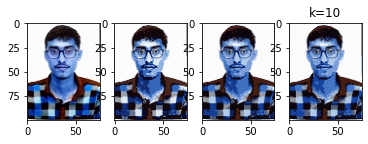

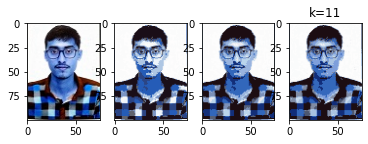

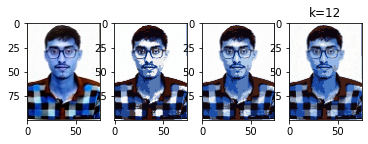

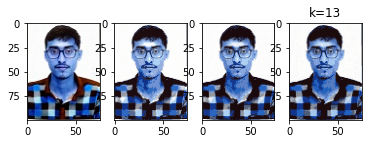

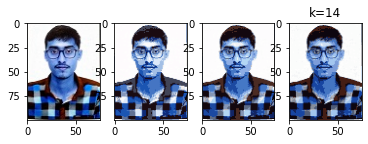

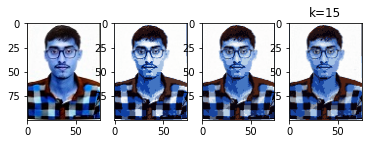

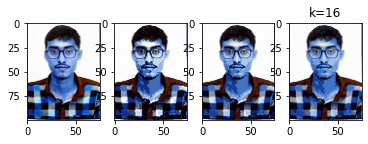

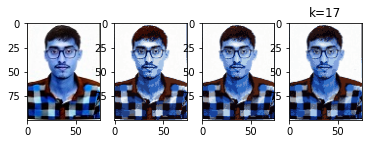

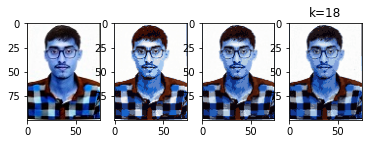

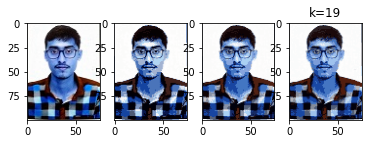

In [14]:
# number of centroids: k range from 1 to 20
for k in range(1,20):
    print(k)
    img = (img/255).reshape(100*75,3) 

    init_centroids = random.sample(range(0,len(img)),k)      # 2nd argument indicate number of centroids

    # get actual value of centroids from index 
    centroids=[]
    for i in init_centroids:
        centroids.append(img[i]) 

    centroids=np.array(centroids)

    new_centroids_arr= []
    for i in range(epoch):
        get_centroids = findClosestCentroid(centroids, img)
        centroids = cal_centroids(get_centroids, img)

        if(i==1):
            new_centroids_arr.append(centroids)
        if(i== (epoch//2)):
            new_centroids_arr.append(centroids)

    #image for epoch=1
    recovered_img_1 = img.copy()
    for i in range(len(img)):
        recovered_img_1[i] = new_centroids_arr[0][get_centroids[i]]
    recovered_img_1 = recovered_img_1.reshape(100,75,3)

    #image for (epoch/2)
    recovered_img_2 = img.copy()
    for i in range(len(img)):
        recovered_img_2[i] = new_centroids_arr[1][get_centroids[i]]
    recovered_img_2 = recovered_img_2.reshape(100,75,3)

    #image for epoch='epoch'
    recovered_img_3 = img.copy()
    for i in range(len(img)):
        recovered_img_3[i] = centroids[get_centroids[i]]
    recovered_img_3 = recovered_img_3.reshape(100,75,3)

    # Plot the images 
    img = cv2.imread('smitpassport.jpg')
    fig,ax = plt.subplots(1,4)
    plt.title('k='+str(k))
    ax[0].imshow(img)
    ax[1].imshow(recovered_img_1)
    ax[2].imshow(recovered_img_2)
    ax[3].imshow(recovered_img_3)